Libraries

In [2]:
import lifesim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Overall parameters

In [3]:
delta_ = np.insert(np.logspace(-10, -1, num=10, base=10), 0, 0, axis=0)

# font
font = {'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

# path to save figures
path = 'C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedFigures/'

Functions

In [4]:
def det_yield(opt_scenario,   # time optimization scenario
            filter_bool,      # selection parameter
            delta, scenario): # range of delta, instrument scenario
    data = {}

    for val in delta:
        # import the previously saved catalog
        bus_read = lifesim.Bus()
        bus_read.data.options.set_scenario(scenario)
        
        # time optimization scenario
        if opt_scenario == 'S1':
            prefix = 'S1'
        elif opt_scenario == 'S2':
            prefix = ''
        else:
            print('ERROR: wrong optimization scenario specified')
            return None
        
        # instrument scenario
        if scenario == 'baseline':
            bus_read.data.import_catalog(input_path='C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/'
                                         + prefix + f'DataBaselineTM_delta={val}.hdf5')
        elif scenario == 'optimistic':
            bus_read.data.import_catalog(input_path='C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/'
                                         + prefix + f'DataOptimisticTM_delta={val}.hdf5')
        elif scenario == 'pessimistic':
            bus_read.data.import_catalog(input_path='C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/'
                                         + prefix + f'DataPessimisticTM_delta={val}.hdf5')
        else:
            print('ERROR: wrong scenario specified')
            return None
    
        # retrieve the DataFrame object we will use
        df = bus_read.data.catalog
    
        # define the selection parameter
        if filter_bool == 'stype':
            param = df.stype
            bool_range = [param == 1, param == 2, param == 3, param == 4]
            filter_range = ["F", "G", "K", "M"]
        elif filter_bool == 'stypeHZ':
            param = df.stype
            bool_range = [(param == 1) & (df.habitable), (param == 2) & (df.habitable), 
                          (param == 3) & (df.habitable), (param == 4) & (df.habitable)]
            filter_range = ["F", "G", "K", "M"]
        elif filter_bool == 'distance':
            param = df.distance_s
            bool_range = [param < 3, (param >= 3) & (param < 5), 
                          (param >= 5) & (param < 7), (param >= 7) & (param < 9), 
                          (param >= 9) & (param < 11), (param >= 11) & (param < 13), 
                          (param >= 13) & (param < 15), param >= 15]
            filter_range = ["<3", "3-5", "5-7", "7-9", "9-11", "11-13", "13-15", ">15"]
        elif filter_bool == 'temperature':
            param = df.temp_p
            bool_range = [param < 125, (param >= 125) & (param < 150), (param >= 150) & (param < 175), 
                          (param >= 175) & (param < 200), (param >= 200) & (param < 225), 
                          (param >= 225) & (param < 250), (param >= 250) & (param < 275), 
                          (param >= 275) & (param < 300), param >= 300]
            filter_range = ["<125", "125-150", "150-175", "175-200", "200-225", "225-250", "250-275", "275-300", ">300"]
        elif filter_bool == 's_insolation':
            param = df.flux_p
            bool_range = [param < 0.2, (param >= 0.2) & (param < 0.4), (param >= 0.4) & (param < 0.6), 
                          (param >= 0.6) & (param < 0.8), (param >= 0.8) & (param < 1.0), 
                          (param >= 1.0) & (param < 1.2), (param >= 1.2) & (param < 1.4), 
                          (param >= 1.4) & (param < 1.6), param >= 1.6]
            filter_range = ["<0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.4", "1.4-1.6", ">1.6"]
        elif filter_bool == 'angular_sep':
            param = df.angsep
            bool_range = [param < 0.1, (param >= 0.1) & (param < 0.2), 
                              (param >= 0.2) & (param < 0.3), param >= 0.3]
            filter_range = ["<0.1", "0.1-0.2", "0.2-0.3", ">0.3"]
        elif filter_bool == 'angular_sep2':
            param = df.angsep
            bool_range = [param < 0.1, (param >= 0.1) & (param < 0.3), param >= 0.3]
            filter_range = ["<0.1", "0.1-0.3", ">0.3"]
        else:
            print("ERROR: wrong selection parameter")
            return None
    
        # select the detectable planets according to the selection parameter
        nb_detected = []
        for filter_ in bool_range:
            selection = filter_ & df.detected
            nb_detected.append(selection.sum()/500)
            data[f'{val}'] = nb_detected

    ObsYield = pd.DataFrame(data, index=filter_range)
    return ObsYield

In [5]:
def cat_yield(opt_scenario,   # time optimization scenario
            delta, scenario): # range of delta, instrument scenario

    # import the previously saved catalog
    bus_read = lifesim.Bus()
    bus_read.data.options.set_scenario(scenario)
        
    # time optimization scenario
    if opt_scenario == 'S1':
        prefix = 'S1'
    elif opt_scenario == 'S2':
        prefix = ''
    else:
        print('ERROR: wrong optimization scenario specified')
        return None
        
    # instrument scenario
    if scenario == 'baseline':
        bus_read.data.import_catalog(input_path='C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/'
                                     + prefix + f'DataBaselineTM_delta={delta}.hdf5')
    elif scenario == 'optimistic':
        bus_read.data.import_catalog(input_path='C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/'
                                     + prefix + f'DataOptimisticTM_delta={delta}.hdf5')
    elif scenario == 'pessimistic':
        bus_read.data.import_catalog(input_path='C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/'
                                     + prefix + f'DataPessimisticTM_delta={delta}.hdf5')
    else:
        print('ERROR: wrong scenario specified')
        return None
    
    # retrieve the DataFrame object we will use
    df = bus_read.data.catalog

    return df

In [6]:
def format_stype(stype):
    if stype == 1:
        return 'F'
    elif stype == 2:
        return 'G'
    elif stype == 3:
        return 'K'
    else:
        return 'M'
    
def computeflux(luminosity, distance):
    # the luminosity of the star is given in Sun luminosities
    Sun_lum = 3.828e+26 # [W]
    
    # the distance is given in parsec  
    parsec = 3.086e+16 # [m]
    
    # Earth's luminosity
    Earth_lum = 1.730e+17 # [W]
    
    # flux of if the Earth was at this distance
    flux_E = Earth_lum / (4 * np.pi * (distance * parsec)**2) # [Wm^-2]
    
    # result returned in units of Earth flux
    return ( luminosity * Sun_lum / (4 * np.pi * (distance * parsec)**2) ) / flux_E

def retrieve_all(opt_scenario, delta, inst_scenario):
    # yields the concatenated dataframe for all the simulations with a given
    # instrument and optimization scenario
    datalist = []
    for val in delta:
        sim_outcome = cat_yield(opt_scenario, val, inst_scenario)
        sim_outcome['delta'] = val
        sim_outcome['integration scenario'] = opt_scenario
        sim_outcome['instrument'] = inst_scenario
        sim_outcome['stellar type'] = sim_outcome['stype'].apply(format_stype)
        sim_outcome['ratioT'] = sim_outcome['temp_p']/sim_outcome['temp_s']
        sim_outcome['flux_s'] = computeflux(sim_outcome['l_sun'], sim_outcome['distance_s'])
        sim_outcome['contrast'] = sim_outcome['flux_p'] / sim_outcome['flux_s']
        datalist.append(sim_outcome)

    df = pd.concat(datalist)
    return df

### Angular separation S1

In [ ]:
#retrieve the three results
aO = det_yield('S1', 'angular_sep2', delta_, 'optimistic')
aB = det_yield('S1', 'angular_sep2', delta_, 'baseline')
aP = det_yield('S1', 'angular_sep2', delta_, 'pessimistic')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
#fig.figsize=(9, 3)

for temp in list(aO.index.values):
    # attribute color to each stellar type
    if temp == "<0.1": 
        clr = 'tomato'
    elif temp == "0.1-0.3": 
        clr = 'limegreen'
    else: # angsep ">0.3"
        clr = 'cornflowerblue'
    ax1.plot(delta_, (aO.loc[temp] - aO.loc[temp][0])/aO.loc[temp][0] * 100, linestyle='solid', color=clr)

for temp in list(aB.index.values):
    # attribute color to each stellar type
    if temp == "<0.1": 
        clr = 'tomato'
    elif temp == "0.1-0.3": 
        clr = 'limegreen'
    else: # angsep ">0.3"
        clr = 'cornflowerblue'
    ax2.plot(delta_, (aB.loc[temp] - aB.loc[temp][0])/aB.loc[temp][0] * 100, linestyle='solid', color=clr)
    
for temp in list(aP.index.values):
    # attribute color to each stellar type
    if temp == "<0.1": 
        clr = 'tomato'
    elif temp == "0.1-0.3": 
        clr = 'limegreen'
    else: # angsep ">0.3"
        clr = 'cornflowerblue'
    ax3.plot(delta_, (aP.loc[temp] - aP.loc[temp][0])/aP.loc[temp][0] * 100, linestyle='solid', color=clr)
    
ax1.set(xlabel='$\delta$', ylabel='$R(\delta)$ [%]')
ax2.set(xlabel='$\delta$', ylabel='$R(\delta)$ [%]')
ax3.set(xlabel='$\delta$', ylabel='$R(\delta)$ [%]')

ax1.legend(list(aO.index.values), loc='best', ncol=2, title='angular separation [arcsec]')
ax2.legend(list(aO.index.values), loc='best', ncol=2, title='angular separation [arcsec]')
ax3.legend(list(aO.index.values), loc='best', ncol=2, title='angular separation [arcsec]')

ax1.title.set_text('optimistic')
ax2.title.set_text('baseline')
ax3.title.set_text('pessimistic')

ax1.set_xscale('log')

ax1.grid()
ax2.grid()
ax3.grid()

plt.xlim(1.e-6,0.1)
fig.set_size_inches(12, 3)

plt.savefig(path + 'S1_angsepPPT', dpi=300, bbox_inches = 'tight')
plt.show()

### Angular separation S2

In [ ]:
#retrieve the three results
aO = det_yield('S2', 'angular_sep2', delta_, 'optimistic')
aB = det_yield('S2', 'angular_sep2', delta_, 'baseline')
aP = det_yield('S2', 'angular_sep2', delta_, 'pessimistic')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
#fig.figsize=(9, 3)

for temp in list(aO.index.values):
    # attribute color to each stellar type
    if temp == "<0.1": 
        clr = 'tomato'
    elif temp == "0.1-0.3": 
        clr = 'limegreen'
    else: # angsep ">0.3"
        clr = 'cornflowerblue'
    ax1.plot(delta_, (aO.loc[temp] - aO.loc[temp][0])/aO.loc[temp][0] * 100, linestyle='solid', color=clr)

for temp in list(aB.index.values):
    # attribute color to each stellar type
    if temp == "<0.1": 
        clr = 'tomato'
    elif temp == "0.1-0.3": 
        clr = 'limegreen'
    else: # angsep ">0.3"
        clr = 'cornflowerblue'
    ax2.plot(delta_, (aB.loc[temp] - aB.loc[temp][0])/aB.loc[temp][0] * 100, linestyle='solid', color=clr)
    
for temp in list(aP.index.values):
    # attribute color to each stellar type
    if temp == "<0.1": 
        clr = 'tomato'
    elif temp == "0.1-0.3": 
        clr = 'limegreen'
    else: # angsep ">0.3"
        clr = 'cornflowerblue'
    ax3.plot(delta_, (aP.loc[temp] - aP.loc[temp][0])/aP.loc[temp][0] * 100, linestyle='solid', color=clr)
    
ax1.set(xlabel='$\delta$', ylabel='$R(\delta)$ [%]')
ax2.set(xlabel='$\delta$', ylabel='$R(\delta)$ [%]')
ax3.set(xlabel='$\delta$', ylabel='$R(\delta)$ [%]')

ax1.legend(list(aO.index.values), loc='best', ncol=2, title='angular separation [arcsec]')
ax2.legend(list(aO.index.values), loc='best', ncol=2, title='angular separation [arcsec]')
ax3.legend(list(aO.index.values), loc='best', ncol=2, title='angular separation [arcsec]')

ax1.title.set_text('optimistic')
ax2.title.set_text('baseline')
ax3.title.set_text('pessimistic')

ax1.set_xscale('log')

ax1.grid()
ax2.grid()
ax3.grid()

plt.xlim(1.e-6,0.1)
fig.set_size_inches(12, 3)

plt.savefig(path + 'S2_angsepPPT', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
df1 = retrieve_all('S1', [0.0, 1.e-3, 1.e-2, 1.e-1], 'baseline')
dfHZ1 = df1[df1['detected'] & df1['habitable']]

df2 = retrieve_all('S2', [0.0, 1.e-3, 1.e-2, 1.e-1], 'baseline')
dfHZ2 = df2[df2['detected'] & df2['habitable']]

dfHZ = pd.concat([dfHZ1, dfHZ2])

In [ ]:
fs = 14 # fontsize
df = retrieve_all('S1', [0.0, 1.e-3], 'baseline')
temp = df[df['detected'] & df['habitable']]

# Plot 
sns.set_theme(style="whitegrid")

graph = sns.relplot(x="distance_s", y="angsep", hue="temp_p", size='radius_p',
            sizes=(20, 200), alpha=.5, palette="autumn", row='delta', col='stellar type',
            height=4, aspect=1, data=temp, legend='auto')

(graph.set_axis_labels("distance to the instrument [pc]", "angular separation [arcsec]", fontsize=fs)
      .set_titles("$\delta =${row_name}, {col_name}-type star", fontsize=fs)
      .tight_layout(w_pad=0))

graph.savefig(path +"S1outputHZ_PPT.png",  dpi=300, bbox_inches = 'tight')

In [ ]:
fs = 14 # fontsize
df = retrieve_all('S2', [0.0, 1.e-3], 'baseline')
temp = df[df['detected'] & df['habitable']]

# Plot 
sns.set_theme(style="whitegrid")

graph = sns.relplot(x="distance_s", y="angsep", hue="temp_p", size='radius_p',
            sizes=(20, 200), alpha=.5, palette="autumn", row='delta', col='stellar type',
            height=4, aspect=1, data=temp, legend='auto')

(graph.set_axis_labels("distance to the instrument [pc]", "angular separation [arcsec]", fontsize=fs)
      .set_titles("$\delta =${row_name}, {col_name}-type star", fontsize=fs)
      .tight_layout(w_pad=0))

graph.savefig(path +"S2outputHZ_PPT.png",  dpi=300, bbox_inches = 'tight')

In [ ]:
df1O = retrieve_all('S1', [0.0], 'optimistic')
df1B = retrieve_all('S1', [0.0], 'baseline')
df1P = retrieve_all('S1', [0.0], 'pessimistic')

df2O = retrieve_all('S2', [0.0], 'optimistic')
df2B = retrieve_all('S2', [0.0], 'baseline')
df2P = retrieve_all('S2', [0.0], 'pessimistic')

df = pd.concat([df1O, df1B, df1P, df2O, df2B, df2P])
temp = df[df['detected'] & df['habitable']]

In [ ]:
fs = 14 # fontsize

# Plot 
sns.set_theme(style="whitegrid")

graph = sns.relplot(x="distance_s", y="angsep", hue="temp_p",
            sizes=(20, 200), alpha=.5, palette="autumn", row='instrument', col='integration scenario',
            height=3, aspect=1.7, data=temp, legend='auto')

(graph.set_axis_labels("distance to the instrument [pc]", "angular separation [arcsec]", fontsize=fs)
      .set_titles("{row_name} configuration, integration scenario {col_name}", fontsize=fs)
      .tight_layout(w_pad=0))

graph.savefig(path +"outputInstrumentConfig_PPT.png",  dpi=300, bbox_inches = 'tight')

In [7]:
df1 = retrieve_all('S1', [0.0, 1.e-3, 1.e-2, 1.e-1], 'baseline')
dfHZ1 = df1[df1['detected'] & df1['habitable']]

df2 = retrieve_all('S2', [0.0, 1.e-3, 1.e-2, 1.e-1], 'baseline')
dfHZ2 = df2[df2['detected'] & df2['habitable']]

dfHZ = pd.concat([dfHZ1, dfHZ2])

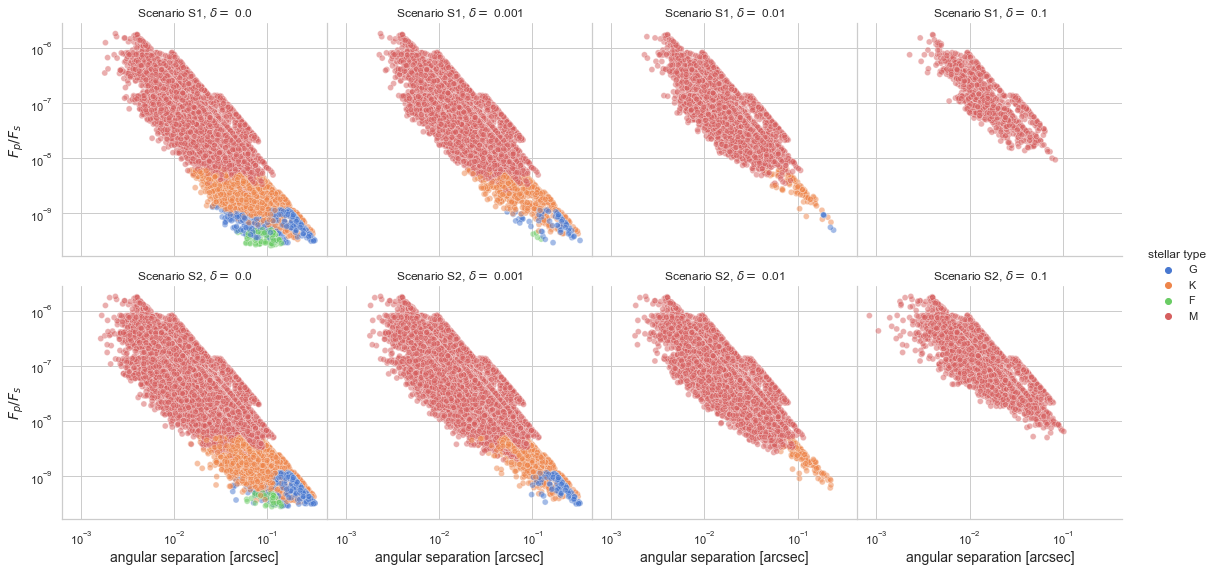

In [9]:
fs = 14 # fontsize
sns.set_theme(style="whitegrid")

# Plot 
graph = sns.relplot(x="angsep", y="contrast", hue="stellar type", row='integration scenario', col='delta',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=4, aspect = 1, data=dfHZ, legend='auto')

(graph.set_axis_labels("angular separation [arcsec]", "$F_p / F_s$", fontsize=fs)
      .set_titles("Scenario {row_name}, $\delta =$ {col_name}", fontsize=fs)
      .tight_layout(w_pad=0))

graph.set(xscale="log")
graph.set(yscale="log")

graph.savefig(path +"AngsepContrastLOG_PPT.png",  dpi=300, bbox_inches = 'tight')

Angular separation

In [12]:
aB = det_yield('S1', 'angular_sep2', delta_, 'baseline')

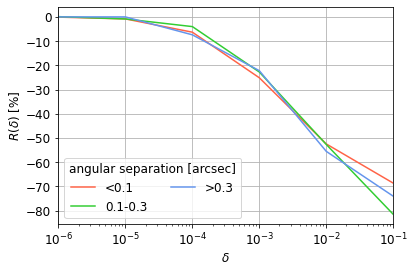

In [13]:
fig, (ax1) = plt.subplots()
fig.figsize=(9, 3)

for temp in list(aB.index.values):
    # attribute color to each stellar type
    if temp == "<0.1": 
        clr = 'tomato'
    elif temp == "0.1-0.3": 
        clr = 'limegreen'
    else: # angsep ">0.3"
        clr = 'cornflowerblue'
    ax1.plot(delta_, (aB.loc[temp] - aB.loc[temp][0])/aB.loc[temp][0] * 100, linestyle='solid', color=clr)
    
ax1.set(xlabel='$\delta$', ylabel='$R(\delta)$ [%]')
ax1.legend(list(aB.index.values), loc='best', ncol=2, title='angular separation [arcsec]')

ax1.grid()
ax1.set_xscale('log')

plt.xlim(1.e-6,0.1)

plt.savefig(path + 'S1_angsep_red_PPT', dpi=300, bbox_inches = 'tight')
plt.show()

In [10]:
aB = det_yield('S2', 'angular_sep2', delta_, 'baseline')

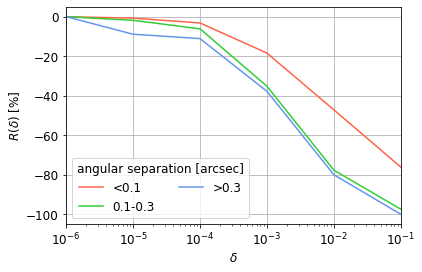

In [11]:
fig, (ax1) = plt.subplots()
fig.figsize=(9, 3)

for temp in list(aB.index.values):
    # attribute color to each stellar type
    if temp == "<0.1": 
        clr = 'tomato'
    elif temp == "0.1-0.3": 
        clr = 'limegreen'
    else: # angsep ">0.3"
        clr = 'cornflowerblue'
    ax1.plot(delta_, (aB.loc[temp] - aB.loc[temp][0])/aB.loc[temp][0] * 100, linestyle='solid', color=clr)
    
ax1.set(xlabel='$\delta$', ylabel='$R(\delta)$ [%]')
ax1.legend(list(aB.index.values), loc='best', ncol=2, title='angular separation [arcsec]')

ax1.grid()
ax1.set_xscale('log')

plt.xlim(1.e-6,0.1)

plt.savefig(path + 'S2_angsep_red_PPT', dpi=300, bbox_inches = 'tight')
plt.show()